In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline


In [3]:
fpath = os.path.abspath("../results_cpp_benchmarker/query_lineage/under_over_tf-resnet-snp/under_over-cpp-aws-results-k80-tf-resnet-feats-batch-8-input-150528-180320_212102.json")
with open(fpath, "r") as f:
    results = json.load(f)

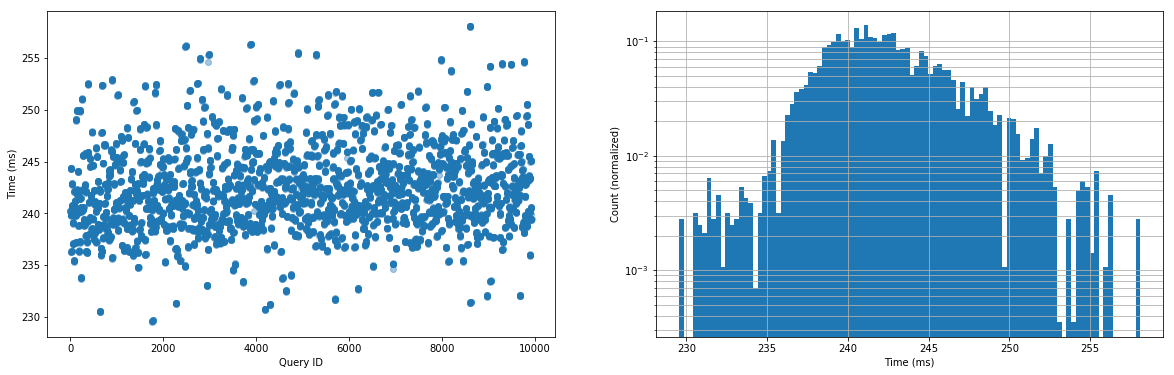

In [5]:
def extract_lineage_deltas(lineage):
    first_key = "driver::send"
    last_key = "driver::recv"
#     first_key = "clipper::frontend_rpc_recv"
#     first_key = "clipper::task_dequeued"
#     first_key = "container::send"
    lats = []
    for entry in lineage[100:]:
        delta = entry[last_key] - entry[first_key]
        lats.append(float(delta) / 1000.0)
    return lats
lats = extract_lineage_deltas(results["latency_results"]["lineage"])
fig, (ax_scatter, ax_hist) = plt.subplots(ncols=2, figsize=(20,6))
ax_scatter.scatter(np.arange(len(lats)), lats, alpha = 0.4)
ax_scatter.set_ylabel("Time (ms)")
ax_scatter.set_xlabel("Query ID")

ax_hist.hist(lats, 100, normed=True, histtype='bar', cumulative=False, log=True)
ax_hist.set_xlabel("Time (ms)")
ax_hist.set_ylabel("Count (normalized)")
ax_hist.grid(b=True, which="both")
plt.show()